In [1]:
import os

In [2]:
# os.environ['CUDA_VISIBLE_DEVICES']='-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
from ase.optimize import BFGS, FIRE
from ase.constraints import ExpCellFilter

In [5]:
from tensorpotential.calculator.foundation_models import grace_fm, GRACEModels

In [6]:
from ase.build import bulk
from ase.phonons import Phonons

# Load model

In [7]:
calc=grace_fm(GRACEModels.MP_GRACE_1L_r6_4Nov2024)

Using cached GRACE model from /home/users/lysogy36/.cache/grace/MP-GRACE-1L-r6_4Nov2024
Model license: Academic Software License


In [8]:
at=bulk('W')

In [9]:
at.calc=calc

In [10]:
at.get_potential_energy()

I0000 00:00:1731686560.546113 1242387 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


-12.917734747705554

In [11]:
BFGS(ExpCellFilter(at)).run()

      Step     Time          Energy         fmax
BFGS:    0 17:02:40      -12.917735        0.9742
BFGS:    1 17:02:40      -12.930532        0.3332
BFGS:    2 17:02:40      -12.932396        0.0156


True

# Phonons

Example from https://wiki.fysik.dtu.dk/ase/ase/phonons.html

## W

In [12]:
! rm -rf phonon/

In [13]:
# Phonon calculator
N = 7
ph = Phonons(at, calc, supercell=(N, N, N), delta=0.05)
ph.run()

In [14]:
# Read forces and assemble the dynamical matrix
ph.read(acoustic=True)
ph.clean()

7

In [15]:
path = at.cell.bandpath( npoints=100)
bs = ph.get_band_structure(path)

dos = ph.get_dos(kpts=(20, 20, 20)).sample_grid(npts=100, width=1e-3)

WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 8.441e-09*i)
WARNING, 2 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 8.441e-09*i)


Text(0.5, 0, 'DOS')

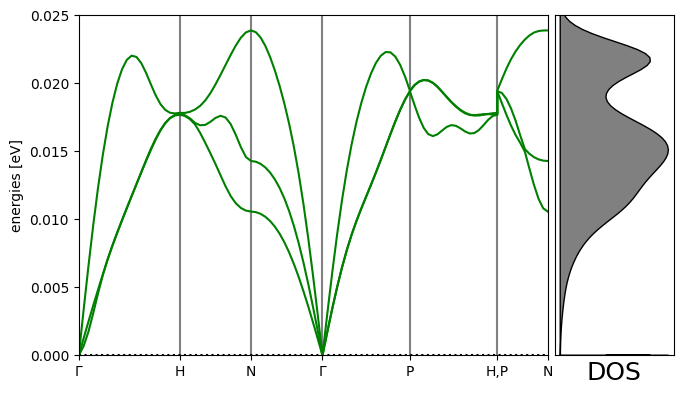

In [16]:
fig = plt.figure(1, figsize=(7, 4))
ax = fig.add_axes([.12, .07, .67, .85])

emax = 0.025
bs.plot(ax=ax, emin=0.0, emax=emax)

dosax = fig.add_axes([.8, .07, .17, .85])
dosax.fill_between(dos.get_weights(), dos.get_energies(), y2=0, color='grey',
                   edgecolor='k', lw=1)

dosax.set_ylim(0, emax)
dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS", fontsize=18)